In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
def getData(year):
    url = 'https://www.nba.com/stats/teams/traditional?dir=A&sort=TEAM_NAME&Season='+year
   
    try:
        driver = webdriver.Chrome()
        driver.get(url)
        
        wait = WebDriverWait(driver, 10)

        ok_button = wait.until(EC.element_to_be_clickable((By.ID, 'onetrust-accept-btn-handler')))
        ok_button.click()

        table = driver.find_element(By.CLASS_NAME, "Crom_table__p1iZz") 

        thead = table.find_elements(By.XPATH, '*')[0]
        tbody = table.find_elements(By.XPATH, '*')[1]

        cols = thead.find_element(By.XPATH, '*')
        rows = tbody.find_elements(By.XPATH, '*')

        colList = cols.text.split()
        data = pd.DataFrame(columns = colList)

        for row in rows:
            lines = row.text.splitlines()
            row0 = lines[0] # teamname
            row1 = lines[1].split() # data
            row1.insert(0,row0)        
            data.loc[len(data.index)] = row1
    finally:
        driver.close()
        return data
   

In [72]:
year23_24 = '2023-24'

In [101]:
df = getData(year23_24) 

In [102]:
df.head(2)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Atlanta Hawks,82,36,46,.439,48.4,118.3,43.0,92.5,46.5,...,32.2,44.7,26.6,13.5,7.5,4.5,5.6,18.6,19.4,-2.2
1,Boston Celtics,82,64,18,.780,48.4,120.6,43.9,90.2,48.7,...,35.6,46.3,26.9,11.9,6.8,6.6,3.7,16.2,17.3,11.3


In [75]:
df.dtypes

TEAM    object
GP      object
W       object
L       object
WIN%    object
MIN     object
PTS     object
FGM     object
FGA     object
FG%     object
3PM     object
3PA     object
3P%     object
FTM     object
FTA     object
FT%     object
OREB    object
DREB    object
REB     object
AST     object
TOV     object
STL     object
BLK     object
BLKA    object
PF      object
PFD     object
+/-     object
dtype: object

In [103]:
df.columns

Index(['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [104]:
df = df.drop(['TEAM', 'GP', 'L', 'WIN%','FG%','3P%','FT%', '+/-'], axis=1)

In [105]:
df = df.astype(float)

In [106]:
df.head(2)
cols = df.columns

In [125]:
scale = StandardScaler()
df = pd.DataFrame(scale.fit_transform(df))
df.columns = cols

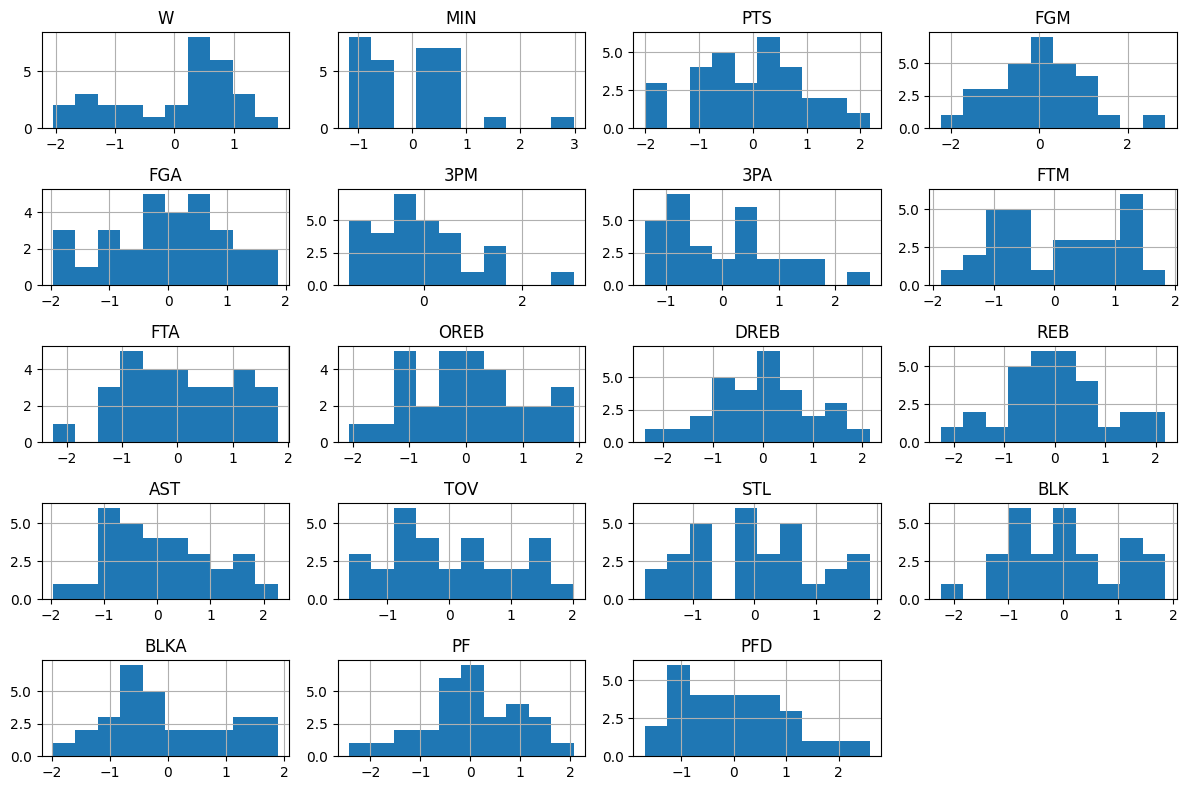

In [ ]:
df.hist(figsize=(12, 8))  
plt.tight_layout()
plt.show()

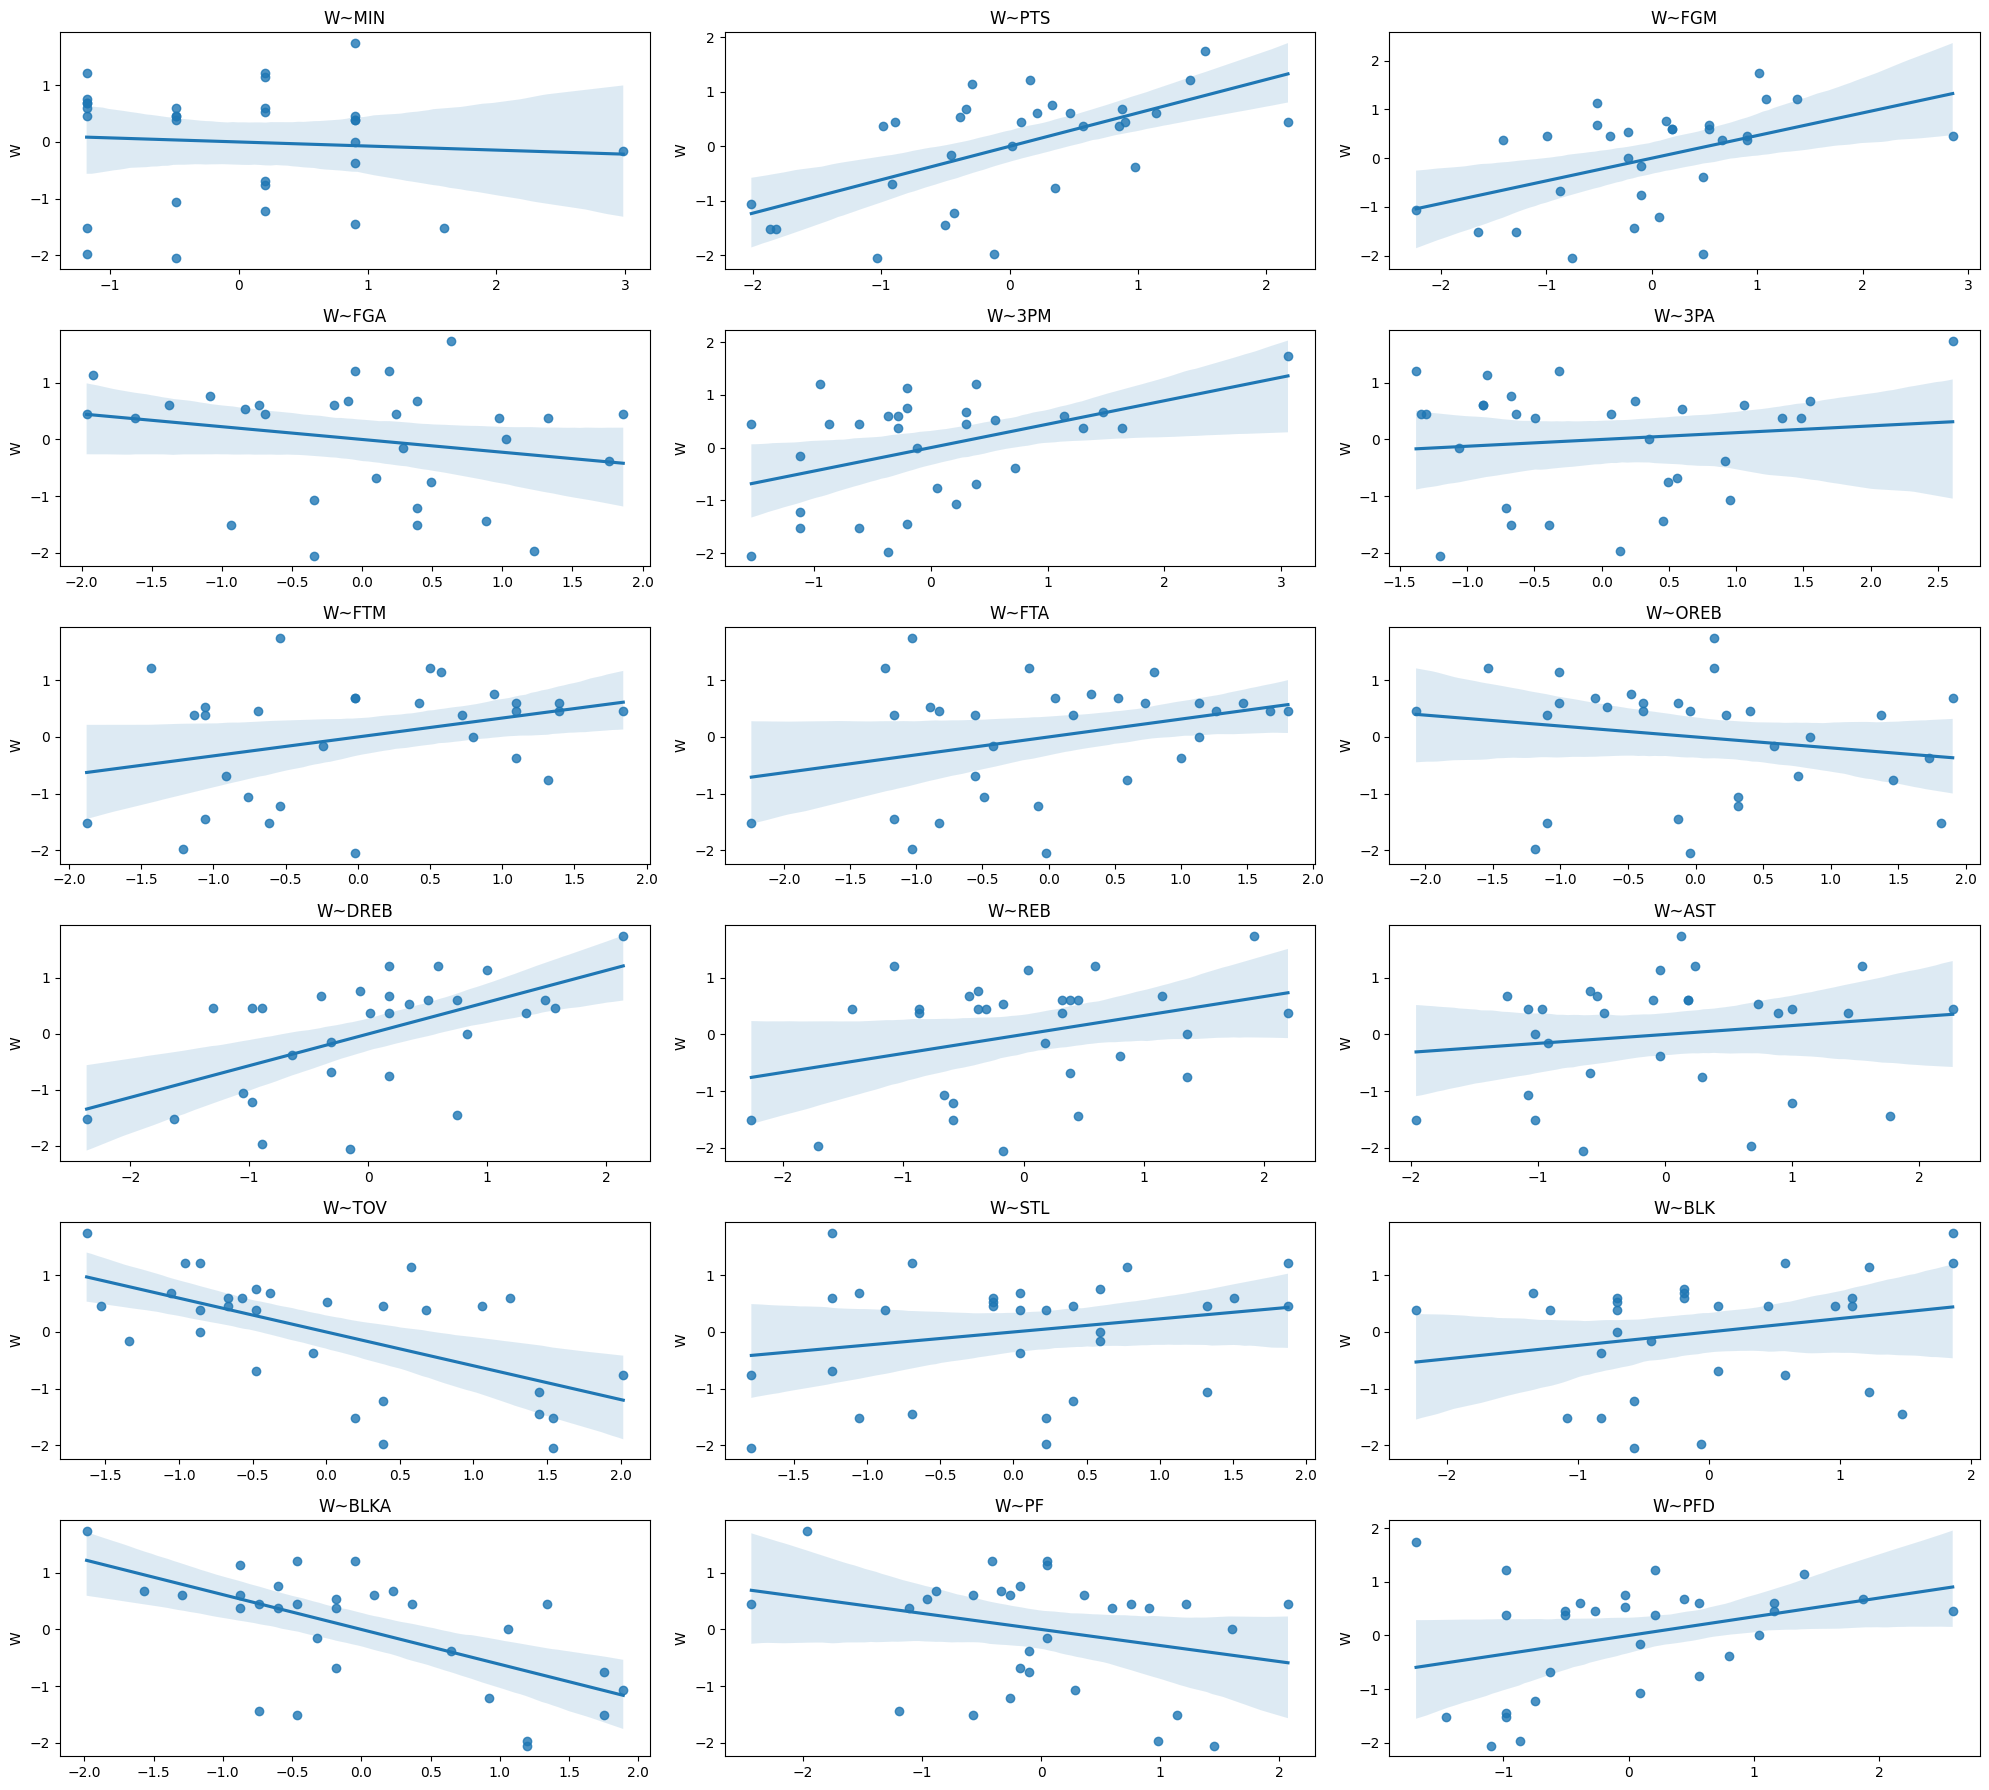

In [134]:
fig, axes = plt.subplots(6,3,figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(cols[1:]):
    sns.regplot(data=df, x=col, y='W',ax=axes[i])
    axes[i].set_title(f"W~{col}")
    axes[i].set_xlabel('')

plt.tight_layout()

In [136]:
X = df.loc[:, 'MIN': 'PFD']
y = df['W']

In [138]:
X2 = sm.add_constant(X)
model  = sm.OLS(y, X2)
restult = model.fit()
print(restult.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     15.52
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           2.33e-05
Time:                        23:18:26   Log-Likelihood:                 6.5311
No. Observations:                  30   AIC:                             24.94
Df Residuals:                      11   BIC:                             51.56
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.059   2.36e-16      1.0

In [ ]:
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(X)

In [ ]:
rmse = root_mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)
print(rmse, r2)

2.5663975418445975 0.962118119194099


In [ ]:
df2 = pd.concat([y, pd.Series(y_pred), pd.Series(y-y_pred)], axis=1)
df2.columns = ['observed', 'predicted', 'residual']
df2

,observed,predicted,residual
0,36.0,38.448253,-2.448253
1,64.0,64.542422,-0.542422
2,32.0,35.167209,-3.167209
3,21.0,22.210864,-1.210864
4,39.0,43.525234,-4.525234
5,48.0,46.706580,1.293420
6,50.0,48.496846,1.503154
7,57.0,51.483815,5.516185
8,14.0,15.051589,-1.051589
9,46.0,46.002550,-0.002550


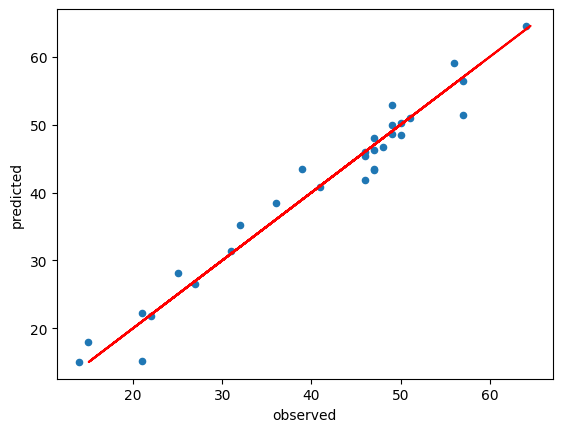

In [ ]:
df2.plot.scatter(x='observed', y='predicted')
plt.plot(df2['predicted'], df2['predicted'], color='red')